<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

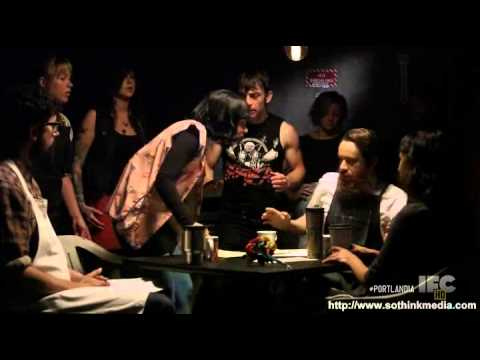

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/kaitlyn/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [41]:
import matplotlib.pyplot as plt

# Base
from collections import Counter
import re
 
# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [124]:
import pandas as pd

#url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv("https://raw.githubusercontent.com/worldwidekatie/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv")
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

# Data Cleaning

In [127]:
# First take care of the dates

dates = []
for i in shops['full_review_text']:
    split_list = i.split(" ")
    dates.append(split_list[1])
    
dates = pd.Series(pd.to_datetime(dates))
shops['date'] = dates
shops.head(1)

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25


In [128]:
# Then take care of the ratings

rating = pd.Series(shops['star_rating'])
rating = rating.str.strip(".0 star rating ").astype(int)
shops['rating'] = rating
shops.head(1)

,coffee_shop_name,full_review_text,star_rating,date,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5


In [129]:
# Then get and clean the tokens

STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'checkin', '-PRON-', ','])

review_text = pd.Series(shops['full_review_text'])
review = []
for i in review_text:
    x = []
    doc = nlp(re.sub('[^a-zA-Z ]', '', i).lower())
    for i in doc:
        if i.lemma_ not in STOP_WORDS:
            x.append(i.lemma_)
    review.append(x)

shops['tokens'] = pd.Series(review)

shops.head(1)

,coffee_shop_name,full_review_text,star_rating,date,rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,"[ , love, love, love, atmosphere, corner, sh..."


In [130]:
# Then make a copy of it so I don't have to go back

df = shops.copy()
df.head(1)

,coffee_shop_name,full_review_text,star_rating,date,rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,"[ , love, love, love, atmosphere, corner, sh..."


In [131]:
# and get rid of the werid blank first item

for row in df['tokens']:
    row.pop(0)

df.head(1)

,coffee_shop_name,full_review_text,star_rating,date,rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,5,"[love, love, love, atmosphere, corner, shop, s..."


In [132]:
# Then slim down the dataframe to relevant stuff

df = df[['coffee_shop_name', 'date', 'rating', 'tokens']]
df

,coffee_shop_name,date,rating,tokens
0,The Factory - Cafe With a Soul,2016-11-25,5,"[love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,2016-12-02,4,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,2016-11-30,4,"[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,2016-11-25,2,"[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,2016-12-03,4,"[locate, northcross, mall, shopping, center, f..."
...,...,...,...,...
7611,The Steeping Room,2015-02-19,4,"[actually, step, restaurant, chance, favorite,..."
7612,The Steeping Room,2016-01-21,5,"[ok, steeping, room, awesome, great, menu, ite..."
7613,The Steeping Room,2015-04-30,4,"[love, come, tea, atmosphere, pretty, fresh, o..."
7614,The Steeping Room,2015-08-02,3,"[food, average, booth, feel, clean, waitstaff,..."


# Word Counts

In [133]:
# Using the function from lecture

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

## Word Count for Everything

In [134]:
wc = count(df['tokens'])
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,,5410,21982,1.0,0.062402,0.062402,0.710347
103,place,3888,6044,2.0,0.017158,0.079559,0.510504
135,good,3587,5383,3.0,0.015281,0.094841,0.470982
124,great,2853,3946,4.0,0.011202,0.106042,0.374606
133,like,2260,3351,5.0,0.009513,0.115555,0.296744
...,...,...,...,...,...,...,...
16092,predictably,1,1,16095.0,0.000003,0.999989,0.000131
16094,windowed,1,1,16096.0,0.000003,0.999991,0.000131
16095,actuality,1,1,16097.0,0.000003,0.999994,0.000131
16096,crass,1,1,16098.0,0.000003,0.999997,0.000131


## Word Counts for Good

In [138]:
good = shops[df['rating'] >= 4]
print(good.shape)
good_wc = count(good['tokens'])
good_wc.head(20)

(6140, 6)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,,4242,16818,1.0,0.061089,0.061089,0.690879
103,place,3133,4816,2.0,0.017494,0.078583,0.510261
167,good,2939,4383,3.0,0.015921,0.094503,0.478664
124,great,2505,3474,4.0,0.012619,0.107122,0.407980
166,like,1668,2414,5.0,0.008769,0.115891,0.271661
8,love,1608,2121,6.0,0.007704,0.123595,0.261889
357,come,1483,1986,7.0,0.007214,0.130809,0.241531
48,austin,1547,1969,8.0,0.007152,0.137961,0.251954
5,shop,1327,1774,9.0,0.006444,0.144405,0.216124
340,time,1325,1756,10.0,0.006378,0.150784,0.215798


## Word Counts for Excellent

In [139]:
great = shops[df['rating'] == 5]
print(great.shape)
great_wc = count(great['tokens'])
great_wc.head(20)

(3780, 6)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,,2463,9139,1.0,0.058409,0.058409,0.651587
95,place,1863,2815,2.0,0.017991,0.076400,0.492857
88,good,1708,2471,3.0,0.015793,0.092193,0.451852
270,great,1560,2182,4.0,0.013946,0.106138,0.412698
8,love,1113,1499,5.0,0.009580,0.115718,0.294444
108,austin,1001,1280,6.0,0.008181,0.123899,0.264815
36,like,893,1264,7.0,0.008078,0.131978,0.236243
167,come,851,1104,8.0,0.007056,0.139033,0.225132
5,shop,793,1046,9.0,0.006685,0.145719,0.209788
148,time,778,1010,10.0,0.006455,0.152174,0.205820


## Word Counts for Bad

In [140]:
bad = shops[df['rating'] <= 3]
print(bad.shape)
bad_wc = count(bad['tokens'])
bad_wc.head(20)

(1476, 6)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,,1168,5164,1.0,0.067097,0.067097,0.791328
13,place,755,1228,2.0,0.015956,0.083053,0.511518
4,good,648,1000,3.0,0.012993,0.096046,0.439024
2,like,592,937,4.0,0.012175,0.108221,0.401084
52,order,433,760,5.0,0.009875,0.118096,0.293360
110,come,452,650,6.0,0.008446,0.126541,0.306233
173,time,420,610,7.0,0.007926,0.134467,0.284553
27,drink,362,607,8.0,0.007887,0.142354,0.245257
145,food,316,494,9.0,0.006419,0.148773,0.214092
137,great,348,472,10.0,0.006133,0.154906,0.235772


## Word Counts for Terrible

In [141]:
terrible = shops[df['rating'] == 1]
print(terrible.shape)
terrible_wc = count(terrible['tokens'])
terrible_wc.head(20)

(278, 6)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
52,,220,996,1.0,0.068832,0.068832,0.791367
17,place,140,232,2.0,0.016033,0.084865,0.503597
78,order,94,181,3.0,0.012509,0.097374,0.338129
83,like,104,173,4.0,0.011956,0.109330,0.374101
25,service,94,129,5.0,0.008915,0.118245,0.338129
33,drink,60,128,6.0,0.008846,0.127091,0.215827
85,time,86,128,7.0,0.008846,0.135936,0.309353
105,come,87,127,8.0,0.008777,0.144713,0.312950
67,customer,65,112,9.0,0.007740,0.152453,0.233813
4,good,82,109,10.0,0.007533,0.159986,0.294964


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [148]:
good_df = good_wc[['word', 'pct_total']].rename(columns={"pct_total": "good_pct"})
good_df.head(2)

,word,good_pct
4,,0.061089
103,place,0.017494


In [149]:
bad_df = bad_wc[['word', 'pct_total']].rename(columns={"pct_total": "bad_pct"})
bad_df.head(2)

,word,bad_pct
32,,0.067097
13,place,0.015956


In [157]:
compare = pd.merge(good_df,
                  bad_df,
                  on='word',
                  how='inner')
compare.head()

,word,good_pct,bad_pct
0,,0.061089,0.067097
1,place,0.017494,0.015956
2,good,0.015921,0.012993
3,great,0.012619,0.006133
4,like,0.008769,0.012175


In [158]:
compare['difference'] = compare['good_pct'] - compare['bad_pct']
compare = compare.sort_values(by='difference')
compare = compare.drop([0], axis=0)
compare.head(2)

,word,good_pct,bad_pct,difference
17,order,0.004969,0.009875,-0.004906
4,like,0.008769,0.012175,-0.003406


In [159]:
print("Higher in Bad Ratings")
compare.head(10)

Higher in Bad Ratings


,word,good_pct,bad_pct,difference
17,order,0.004969,0.009875,-0.004906
4,like,0.008769,0.012175,-0.003406
133,ask,0.001257,0.004210,-0.002953
158,customer,0.001115,0.003794,-0.002679
30,service,0.003393,0.005808,-0.002415
43,taste,0.002844,0.004937,-0.002093
197,bad,0.000897,0.002975,-0.002078
218,minute,0.000810,0.002586,-0.001776
10,drink,0.006237,0.007887,-0.001650
89,review,0.001932,0.003560,-0.001628


In [160]:
print("Higher in Good Ratings")
compare.tail(10)

Higher in Good Ratings


,word,good_pct,bad_pct,difference
25,spot,0.003720,0.001988,0.001732
54,perfect,0.002539,0.000546,0.001993
44,favorite,0.002819,0.000741,0.002078
49,amazing,0.002724,0.000624,0.002101
13,friendly,0.005390,0.002612,0.002779
2,good,0.015921,0.012993,0.002927
7,austin,0.007152,0.003677,0.003475
18,delicious,0.004773,0.001143,0.003630
5,love,0.007704,0.003300,0.004404
3,great,0.012619,0.006133,0.006486


# Just playing around

In [163]:
df.coffee_shop_name.value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Venezia Italian Gelato                  200
Houndstooth Coffee                      200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [174]:
epoch = df[df['coffee_shop_name'] == 'Epoch Coffee ']
halcyon = df[df['coffee_shop_name'] == 'Halcyon ']
factory = df[df['coffee_shop_name'] == 'The Factory - Cafe With a Soul ']
venezia = df[df['coffee_shop_name'] == 'Venezia Italian Gelato ']
houndstooth = df[df['coffee_shop_name'] == 'Houndstooth Coffee ']

In [183]:
epoch.rating.describe()

count    400.000000
mean       3.812500
std        1.179331
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [184]:
halcyon.rating.describe()

count    300.000000
mean       3.820000
std        1.082361
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [185]:
factory.rating.describe()

count    244.000000
mean       4.360656
std        1.042832
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [186]:
venezia.rating.describe()

count    200.000000
mean       4.810000
std        0.629189
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [187]:
houndstooth.rating.describe()

count    200.00000
mean       4.17500
std        0.98449
min        1.00000
25%        4.00000
50%        4.00000
75%        5.00000
max        5.00000
Name: rating, dtype: float64

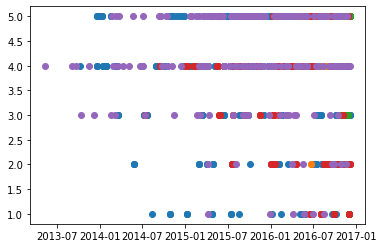

In [192]:
plt.scatter(epoch['date'], epoch['rating'])
plt.scatter(venezia['date'], venezia['rating'])
plt.scatter(factory['date'], factory['rating'])
plt.scatter(halcyon['date'], halcyon['rating'])
plt.scatter(houndstooth['date'], houndstooth['rating'])
plt.show();

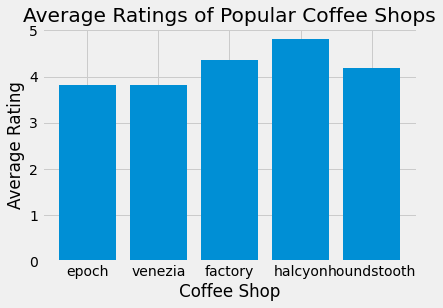

In [196]:
plt.style.use('fivethirtyeight')

x = ['epoch', 'venezia', 'factory', 'halcyon', 'houndstooth']
energy = [3.81, 3.82, 4.36, 4.81, 4.18]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy)
plt.xlabel("Coffee Shop")
plt.ylabel("Average Rating")
plt.title("Average Ratings of Popular Coffee Shops")

plt.xticks(x_pos, x)

plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

